#### Импорт библиотек

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

#### Инициализация модели

In [3]:
model = YOLO('best.pt')

#### Пропроцессинг фотографий

In [60]:
def equalizeImg(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    equalizedImg = cv2.equalizeHist(gray)
    return equalizedImg

In [72]:
def cannyDilImg(img):
    kernel = np.ones((5,5))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imageProcess = cv2.bilateralFilter(gray, 9, 75, 75)
    canny = cv2.Canny(imageProcess, 50, 150)
    dil = cv2.dilate(canny, kernel, iterations=1)
    return canny, dil

In [73]:
testimg = cv2.imread('Assets/pictures/1.jpg')
cannyimg, dilimg = cannyDilImg(testimg)
equalizedimg = equalizeImg(testimg)

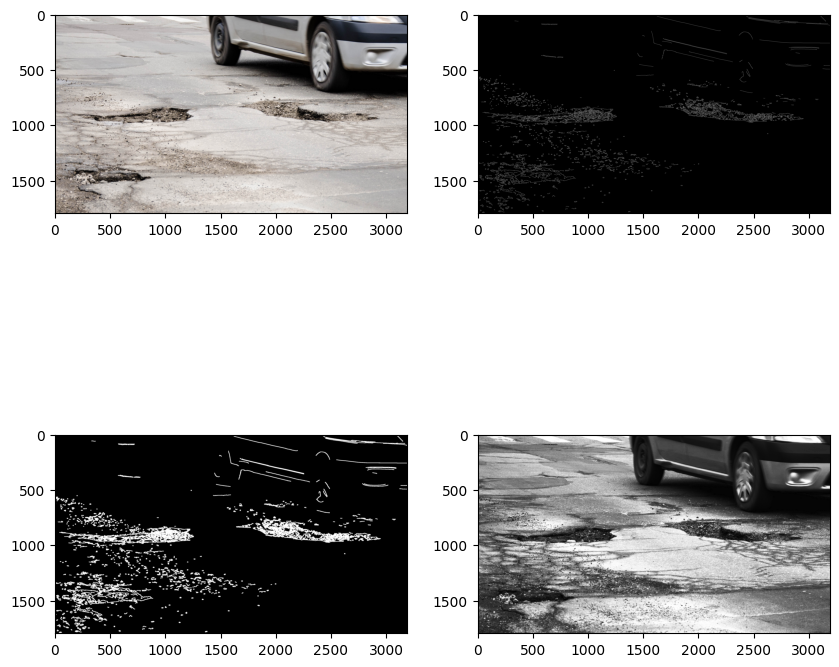

In [74]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0][0].imshow(cv2.cvtColor(testimg, cv2.COLOR_BGR2RGB), cmap='gray')
axs[0][1].imshow(cannyimg, cmap='gray')
axs[1][0].imshow(dilimg, cmap='gray')
axs[1][1].imshow(equalizedimg, cmap='gray')

# plt.subplot(121)
# plt.title("Original image")
# plt.subplot(122)
# plt.title("Canny image")
# plt.subplot(221)
# plt.title("Dilate image")
# plt.subplot(222)
# plt.title("Equalized image")

plt.show()

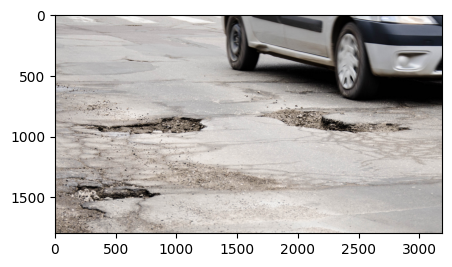

In [53]:
fig, axs = plt.subplots(figsize=(5,5))
axs.imshow(cv2.cvtColor(testimg, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
res1 = model()